In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
f = open('coords/coords_step0000000.dat')
line = f.readline()
N = int(line.split("\n")[0])
print(N)

2


In [11]:
steps, kinetic_energy, potential_energy = np.loadtxt("state_variables.txt").transpose()

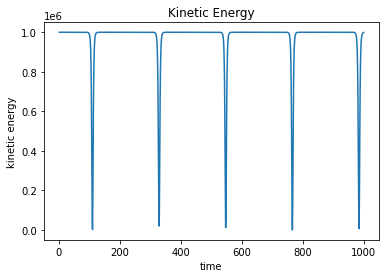

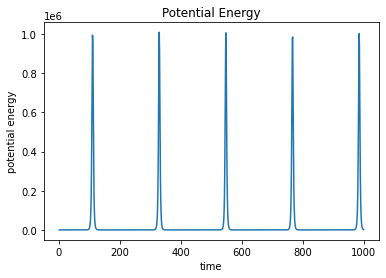

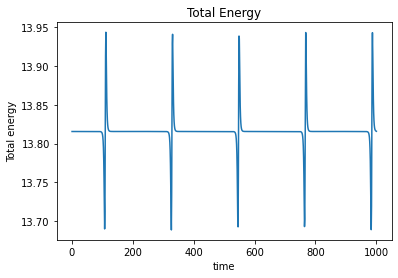

In [13]:
plt.title('Kinetic Energy')
plt.xlabel('time')
plt.ylabel('kinetic energy')
plt.plot(steps, kinetic_energy)
plt.savefig("kinetic.png", dpi=100)
plt.show()

plt.title('Potential Energy')
plt.xlabel('time')
plt.ylabel('potential energy')
plt.plot(steps, potential_energy)
plt.savefig("potential.png", dpi=100)
plt.show()

plt.title('Total Energy')
plt.xlabel('time')
plt.ylabel('Total energy')
plt.savefig("total.png", dpi=100)
plt.plot(steps, np.log(kinetic_energy + potential_energy))
plt.show()

(0.0, 3.3333333333333335)

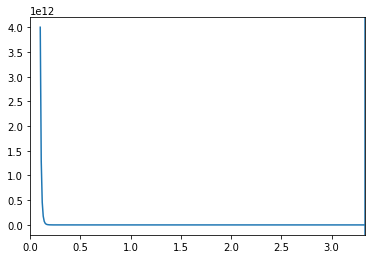

In [67]:
# analyse Lennard-Jones potential energy and force
r_max = 10
r = np.linspace(0.1,r_max,1000)
r_cut = r_max / 3
e_cut = (4/r_cut**6) * ((1/r_cut**6) - 1)
energy = (4/r**6) * ((1/r**6) - 1) - e_cut
plt.plot(r, energy)
plt.axvline(r_cut)
plt.xlim(0, r_cut)

Expected std deviation: 1.41421
Obtained std deviation: 1.4166876778038895


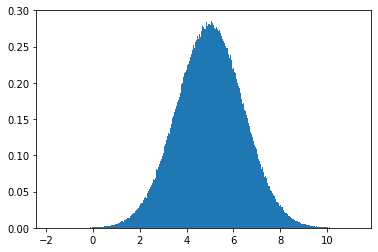

In [25]:
# test boltzmann sample generator
boltz = np.loadtxt("boltzmann.txt")
std_dev = boltz[0]
boltz = boltz[1:]
print(f'Expected std deviation: {std_dev}')
print(f'Obtained std deviation: {np.std(boltz)}')
plt.hist(boltz, density = True, bins = "auto")
plt.show()